Importing plotly failed. Interactive plots will not work.
C:\Users\SHIVAM JANI\AppData\Local\Temp\ipykernel_12064\1748595668.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Dataset Preview:
 Price             Close
Ticker           TCS.NS
Date                   
2015-01-01  1073.509888
2015-01-02  1087.806396
2015-01-05  1071.275146
2015-01-06  1031.781128
2015-01-07  1019.593506


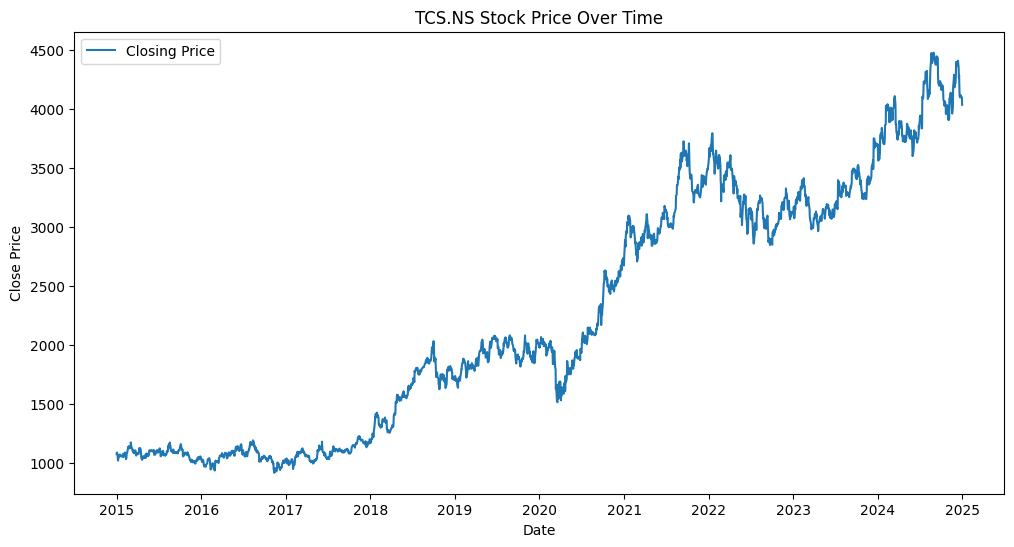


Training ARIMA Model...


C:\Users\SHIVAM JANI\.conda\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SHIVAM JANI\.conda\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SHIVAM JANI\.conda\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SHIVAM JANI\.conda\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer ind

ARIMA RMSE: 668.9580643152159


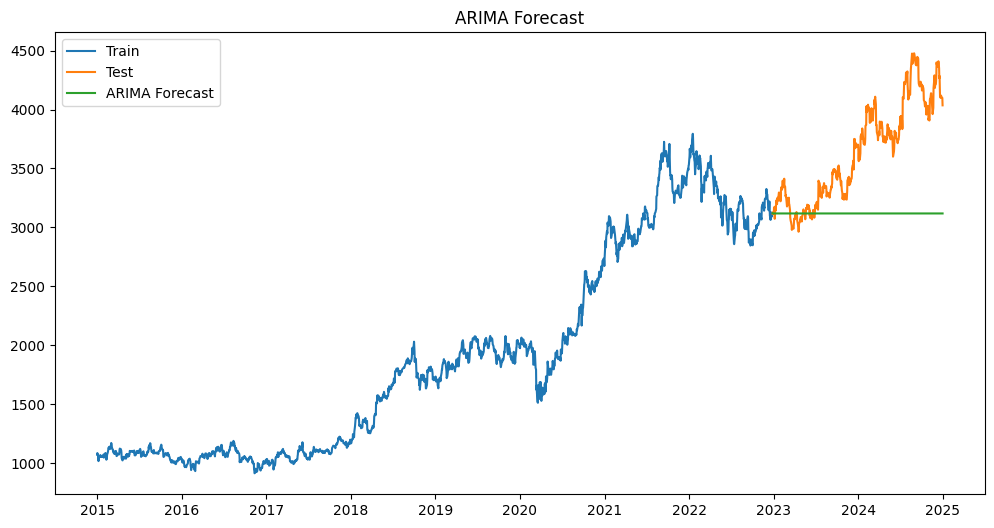


Training SARIMA Model...


C:\Users\SHIVAM JANI\.conda\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SHIVAM JANI\.conda\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SHIVAM JANI\.conda\envs\tf_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SHIVAM JANI\.conda\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  r

SARIMA RMSE: 380.9830839520429


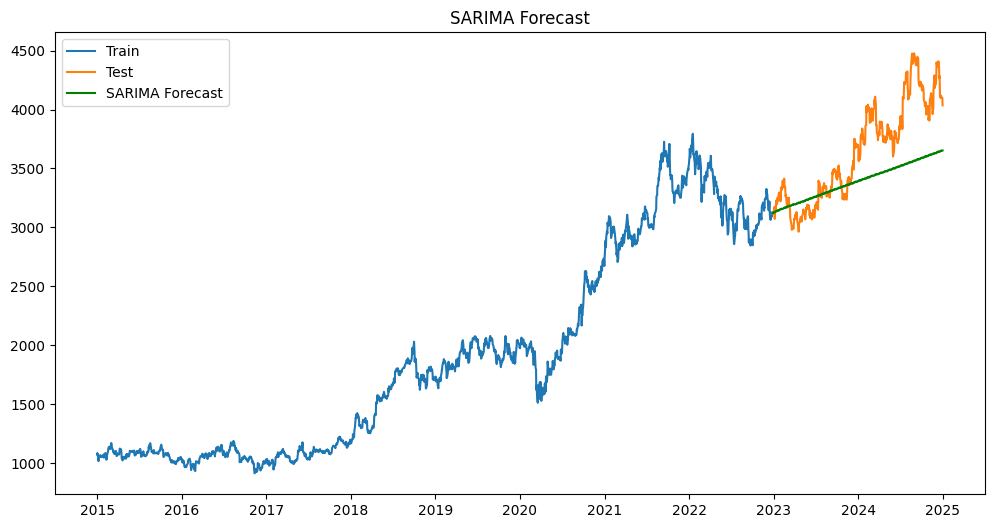


Training Prophet Model...


15:28:46 - cmdstanpy - INFO - Chain [1] start processing
15:28:48 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 671.2250868199635


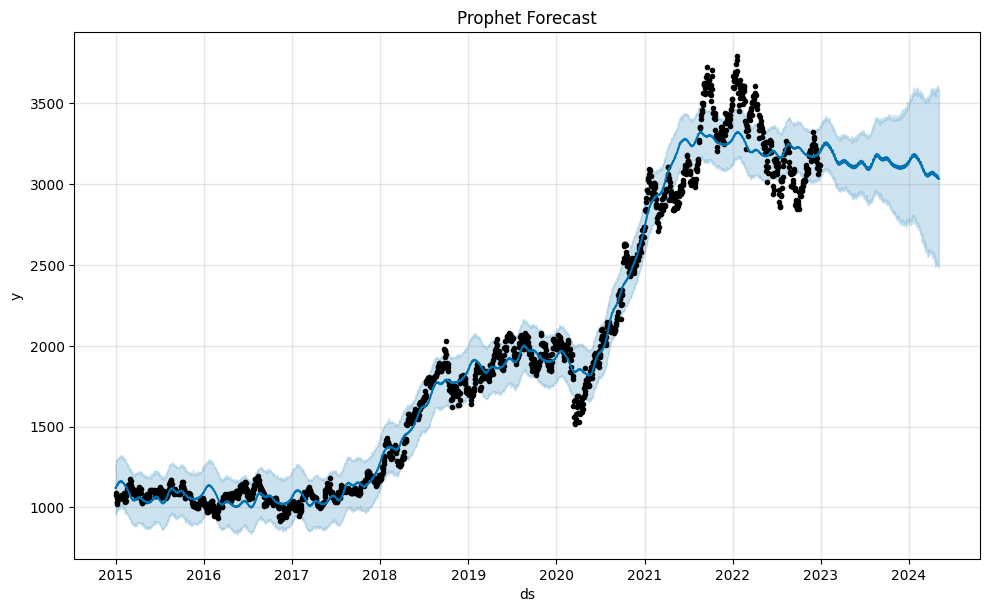


Training LSTM Model...
Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 0.0026
Epoch 2/10
1/1 [==============================] - 0s 66ms/step - loss: 0.0012
Epoch 3/10
1/1 [==============================] - 0s 73ms/step - loss: 5.6143e-04
Epoch 4/10
1/1 [==============================] - 0s 72ms/step - loss: 7.2709e-05
Epoch 5/10
1/1 [==============================] - 0s 74ms/step - loss: 1.6740e-05
Epoch 6/10
1/1 [==============================] - 0s 75ms/step - loss: 1.8746e-04
Epoch 7/10
1/1 [==============================] - 0s 77ms/step - loss: 3.7699e-04
Epoch 8/10
1/1 [==============================] - 0s 73ms/step - loss: 2.7943e-04
Epoch 9/10
1/1 [==============================] - 0s 74ms/step - loss: 4.8863e-05
Epoch 10/10
1/1 [==============================] - 2s 2s/step
LSTM RMSE: 1508.1895603669984


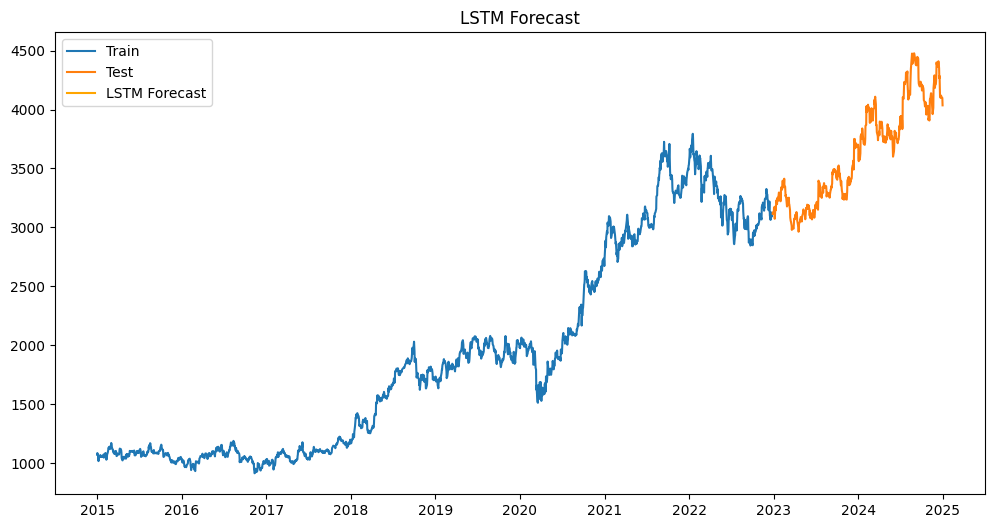


📊 Model Performance:
ARIMA RMSE   : 668.96
SARIMA RMSE  : 380.98
Prophet RMSE : 671.23
LSTM RMSE    : 1508.19


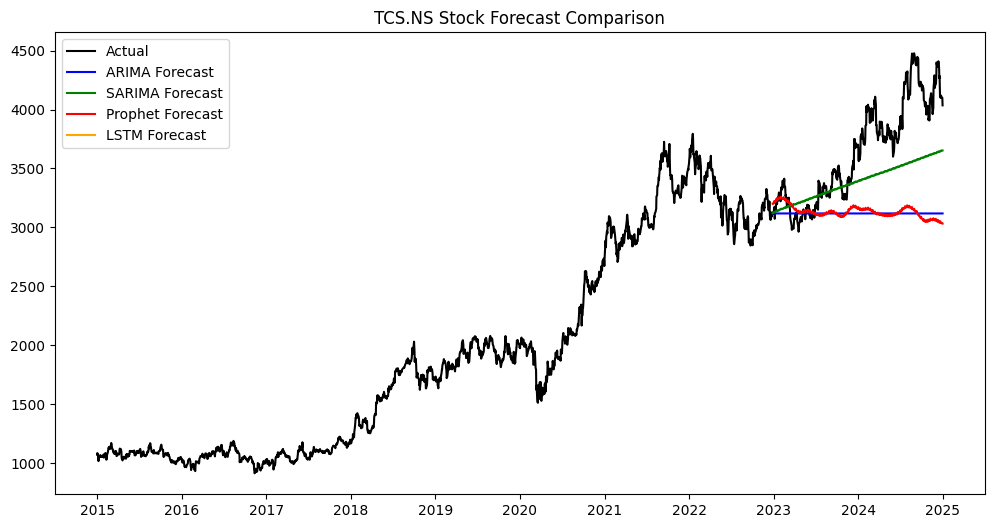

In [1]:
# %pip install yfinance
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX   # ✅ Added for SARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler   # ✅ Needed for LSTM
import yfinance as yf
import math

# Deep Learning Libraries for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Stock Market Data 
ticker = "TCS.NS"  
df = yf.download(ticker, start="2015-01-01", end="2025-01-01")

# Preprocessing
df = df[['Close']].reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print("Dataset Preview:\n", df.head())

# Visualization
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Closing Price")
plt.title(f"{ticker} Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


# ARIMA MODEL
print("\nTraining ARIMA Model...")
arima_model = ARIMA(train['Close'], order=(5,1,0))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test))

# Evaluate
arima_rmse = math.sqrt(mean_squared_error(test['Close'], arima_pred))
print("ARIMA RMSE:", arima_rmse)

# ARIMA Forecast Ploting
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close'], label="Train")
plt.plot(test.index, test['Close'], label="Test")
plt.plot(test.index, arima_pred, label="ARIMA Forecast")
plt.legend()
plt.title("ARIMA Forecast")
plt.show()


# SARIMA MODEL
print("\nTraining SARIMA Model...")
sarima_model = SARIMAX(train['Close'],
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12),  # 12 = yearly seasonality (monthly data → 12 months)
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False)
sarima_pred = sarima_fit.forecast(steps=len(test))

# Evaluate
sarima_rmse = math.sqrt(mean_squared_error(test['Close'], sarima_pred))
print("SARIMA RMSE:", sarima_rmse)

# SARIMA Forecast Ploting
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close'], label="Train")
plt.plot(test.index, test['Close'], label="Test")
plt.plot(test.index, sarima_pred, label="SARIMA Forecast", color="green")
plt.legend()
plt.title("SARIMA Forecast")
plt.show()

# PROPHET MODEL
print("\nTraining Prophet Model...")

# Prophet expects columns: ds (date), y (value)
prophet_df = df.reset_index()[['Date', 'Close']]
prophet_df.columns = ['ds', 'y']

prophet_train = prophet_df.iloc[:train_size]
prophet_test = prophet_df.iloc[train_size:]

prophet = Prophet(daily_seasonality=True)
prophet.fit(prophet_train)

future = prophet.make_future_dataframe(periods=len(prophet_test))
forecast = prophet.predict(future)

# Evaluate
prophet_rmse = math.sqrt(mean_squared_error(prophet_test['y'], forecast['yhat'].iloc[-len(prophet_test):]))
print("Prophet RMSE:", prophet_rmse)

# Prophet Forecast Ploting
prophet.plot(forecast)
plt.title("Prophet Forecast")
plt.show()


# LSTM MODEL
print("\nTraining LSTM Model...")

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Close']].values)

# Preparing sequences
time_step = 60
def create_sequences(data, step):
    X, y = [], []
    for i in range(step, len(data)):
        X.append(data[i-step:i, 0])
        y.append(data[i, 0])
        return np.array(X), np.array(y)

train_scaled = scaled_data[:train_size]
test_scaled = scaled_data[train_size - time_step:]

X_train, y_train = create_sequences(train_scaled, time_step)
X_test, y_test   = create_sequences(test_scaled, time_step)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Building LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_step,1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predictions
lstm_pred_scaled = lstm_model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)
lstm_pred = pd.Series(lstm_pred.reshape(-1), index=test.index[:len(lstm_pred)])

# Evaluate
lstm_rmse = math.sqrt(mean_squared_error(test['Close'][:len(lstm_pred)], lstm_pred))
print("LSTM RMSE:", lstm_rmse)

# LSTM Forecast ploting
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close'], label="Train")
plt.plot(test.index, test['Close'], label="Test")
plt.plot(lstm_pred.index, lstm_pred.values, label="LSTM Forecast", color="orange")
plt.legend()
plt.title("LSTM Forecast")
plt.show()

# Model Comparison
print("\n📊 Model Performance:")
print(f"ARIMA RMSE   : {arima_rmse:.2f}")
print(f"SARIMA RMSE  : {sarima_rmse:.2f}")
print(f"Prophet RMSE : {prophet_rmse:.2f}")
print(f"LSTM RMSE    : {lstm_rmse:.2f}")

# ✅ Final Visualization
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Actual", color="black")
plt.plot(test.index, arima_pred, label="ARIMA Forecast", color="blue")
plt.plot(test.index, sarima_pred, label="SARIMA Forecast", color="green")
plt.plot(prophet_test['ds'], forecast['yhat'].iloc[-len(prophet_test):], label="Prophet Forecast", color="red")
plt.plot(lstm_pred.index, lstm_pred.values, label="LSTM Forecast", color="orange")
plt.legend()
plt.title(f"{ticker} Stock Forecast Comparison")
plt.show()






